In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numba as nb
import cupy as cp
from tqdm.auto import tqdm
from abtem.waves import SMatrixBuilder, Probe
from abtem.potentials import Potential

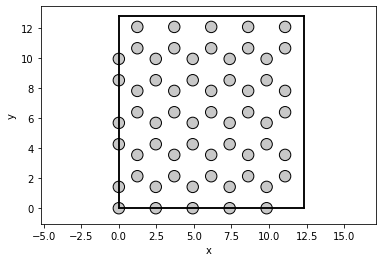

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from ase.io import read
from abtem.plot import show_atoms
from ase import Atoms

from ase.io import read
from abtem.scan import LineScan, GridScan
from abtem.detect import AnnularDetector
from abtem.waves import Probe
from abtem.measure import Measurement
from abtem.potentials import Potential
from abtem.temperature import TDS

atoms = read('graphene.cif') * (5, 3, 1)
atoms.center(vacuum=3,axis=2)
show_atoms(atoms)

potential = Potential(atoms, sampling=.05)
potential.grid.snap_to_power(2)

In [9]:
#linescan = LineScan(start=[2 * np.sqrt(3) * 1.42, 0], end=[2 * np.sqrt(3) * 1.42, 3 * 1.42], gpts=100)

S_builder = SMatrixBuilder(.03, 1, energy=80e3, device='gpu')
S_builder.grid.match(potential)
#haadf = AnnularDetector(inner=.09, outer=.2)

#gridscan = GridScan(start=[0, 0], end=[np.sqrt(3) * 1.42, 3 * 1.42], sampling=.1)

#measurements = S_builder.scan(gridscan, [haadf], potential, max_batch=32, pbar=True)

In [10]:
for i in tqdm(range(10000)):
    S_builder.build().collapse(np.zeros((32,2)))

KeyboardInterrupt: 

(<matplotlib.axes._subplots.AxesSubplot at 0x2e67a209288>,
 <matplotlib.image.AxesImage at 0x2e6799ff308>)

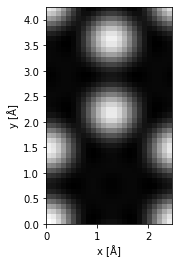

In [11]:
measurements[haadf].show()

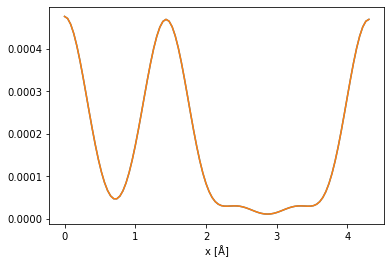

In [5]:
ax = Measurement.read('linescan.hdf5').show()
measurements[haadf].show(ax=ax)

In [4]:
from abtem.detect import AnnularDetector
from abtem.scan import LineScan

potential = Potential(atoms, sampling=.05, slice_thickness=1).calculate().as_transmission_functions(80e3)
linescan = LineScan(start=[2 * np.sqrt(3) * 1.42, 0], end=[2 * np.sqrt(3) * 1.42, 3 * 1.42], gpts=10)
bright = AnnularDetector(inner=.0, outer=.02)

S_builder = SMatrixBuilder(.03, 1, energy=80e3, extent=5, sampling=.05)
#S = S_builder.multislice(potential)
probe = Probe(semiangle_cutoff=.03, energy=80e3, extent=2, sampling=.05)

#detector = AnnularDetector(inner=.086, outer=.19)
#gridscan = GridScan(start=[0, 0], end=[np.sqrt(3) * 1.42, 3 * 1.42], sampling=.2)
#prism_measurements = S.scan(linescan, [detector], max_batch=10, show_progress=False)
#measurements = probe.scan(linescan, [detector], potential, max_batch=50, show_progress=False)

#measurements[detector].array - prism_measurements[detector].array

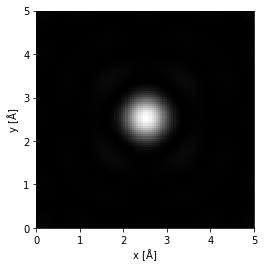

In [5]:
#plt.imshow(S_builder.build().array[0].real-S_builder.build().array[-1].real)
#plt.colorbar()
S = S_builder.build()
S.collapse([2.5,2.5]).intensity[0].show()

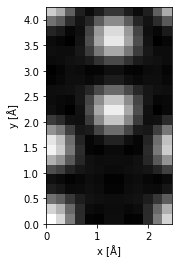

In [22]:
measurements[detector].show()

In [6]:


probe = Probe(semiangle_cutoff=.03, energy=80e3)
probe.grid.match(potential)
#probe = probe.build([[0,0]]).array[0]


#potential.show(scans=gridscan)

measurements = probe.scan(gridscan, potential, [detector], max_batch=200, show_progress=True)

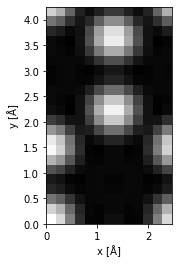

In [52]:
measurements[detector].show()

In [57]:
S_builder = SMatrixBuilder(.03, 2, energy=80e3, gpts=512, extent=10)
S = S_builder.build()
#S.set_position([5,5])
#p = S.array.sum(0)
#S.always_recenter=False

In [68]:
for i in tqdm(range(1000000)):
    S_probe = S.collapse([0,0])#.show()


#probe = Probe(semiangle_cutoff=.03, energy=80e3, extent=S.extent / 2, gpts=S.gpts // 2).build([2.5,2.5])
#p.show()

KeyboardInterrupt: 

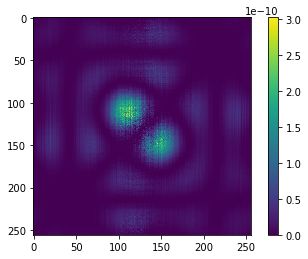

In [67]:
plt.imshow(np.abs(S_probe.array- probe.array)[0] ** 2)
plt.colorbar()

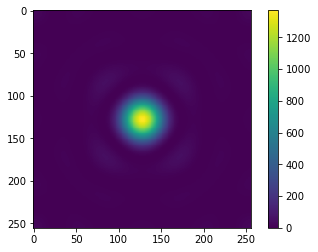

In [66]:
plt.imshow(np.abs(probe.array)[0] ** 2)
plt.colorbar()